In [12]:
import pandas as pd

# Load the dataset
file_path = 'ChatGPT Reviews.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values and data types
print(data.info())

                               reviewId         userName  \
0  95aec438-4b13-4571-83ce-d14451c64acc   Waithera Rigii   
1  bb03f73e-8a32-409a-95df-94370d64ac61     Mahmoud Taha   
2  3eff2ec2-d04d-4ee2-9e51-089d738a6bf2  Jason Quilliams   
3  f420d3c4-2891-4939-9518-ba0dbe10d738  Muhammad Yousaf   
4  40e8ae39-8e4e-42d0-8920-6ade29492ce3    Ebrima Touray   

                                             content  score  thumbsUpCount  \
0  Amazing responses. Great understanding of the ...      5              0   
1                                                  👍      5              0   
2                                   it's really good      5              0   
3                                               Well      5              0   
4                                       love it 100%      5              0   

  reviewCreatedVersion                at  appVersion  
0           1.2024.157  16-06-2024 21:56  1.2024.157  
1           1.2024.131  16-06-2024 21:55  1.2024.131  
2    

In [13]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Load the dataset
file_path = 'ChatGPT Reviews.csv'  # Ensure this path is correct and matches your file's location
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values and data types
print(data.info())

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def preprocess_text(text):
    try:
        # Handle non-string values
        if not isinstance(text, str):
            return ''
        # Tokenize
        tokens = word_tokenize(text)
        # Lowercase
        tokens = [token.lower() for token in tokens]
        # Remove punctuation and stop words
        tokens = [token for token in tokens if token not in stop_words and token not in punctuations]
        # Lemmatize
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")
        return ''

# Apply preprocessing to the 'content' column
data['cleaned_content'] = data['content'].apply(preprocess_text)

# Display the cleaned content
print(data[['content', 'cleaned_content']].head())


                               reviewId         userName  \
0  95aec438-4b13-4571-83ce-d14451c64acc   Waithera Rigii   
1  bb03f73e-8a32-409a-95df-94370d64ac61     Mahmoud Taha   
2  3eff2ec2-d04d-4ee2-9e51-089d738a6bf2  Jason Quilliams   
3  f420d3c4-2891-4939-9518-ba0dbe10d738  Muhammad Yousaf   
4  40e8ae39-8e4e-42d0-8920-6ade29492ce3    Ebrima Touray   

                                             content  score  thumbsUpCount  \
0  Amazing responses. Great understanding of the ...      5              0   
1                                                  👍      5              0   
2                                   it's really good      5              0   
3                                               Well      5              0   
4                                       love it 100%      5              0   

  reviewCreatedVersion                at  appVersion  
0           1.2024.157  16-06-2024 21:56  1.2024.157  
1           1.2024.131  16-06-2024 21:55  1.2024.131  
2    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             content  \
0  Amazing responses. Great understanding of the ...   
1                                                  👍   
2                                   it's really good   
3                                               Well   
4                                       love it 100%   

                                     cleaned_content  
0  amazing response great understanding prompt re...  
1                                                  👍  
2                                     's really good  
3                                               well  
4                                           love 100  


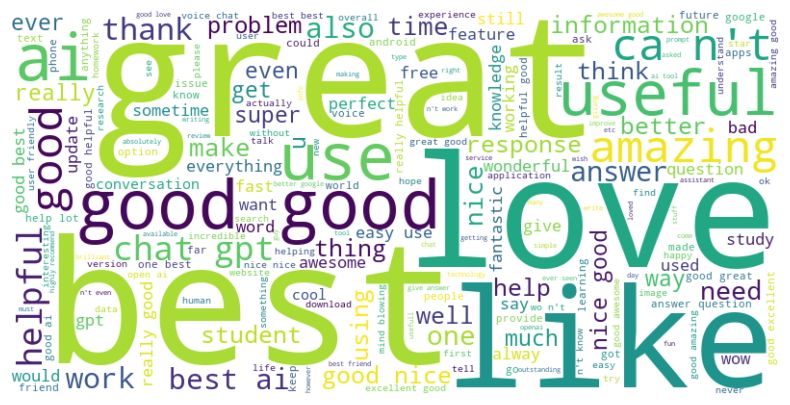

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define custom stop words
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(["app", "chatgpt"])  # Add more words as needed

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(' '.join(data['cleaned_content']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_content'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

    ai   amazing  answer  app  best  chat  chatgpt  excellent      good  \
0  0.0  0.732223     0.0  0.0   0.0   0.0      0.0        0.0  0.000000   
1  0.0  0.000000     0.0  0.0   0.0   0.0      0.0        0.0  0.000000   
2  0.0  0.000000     0.0  0.0   0.0   0.0      0.0        0.0  0.526728   
3  0.0  0.000000     0.0  0.0   0.0   0.0      0.0        0.0  0.000000   
4  0.0  0.000000     0.0  0.0   0.0   0.0      0.0        0.0  0.000000   

      great  help  helpful  like  love  nice  question    really  use  useful  \
0  0.681065   0.0      0.0   0.0   0.0   0.0       0.0  0.000000  0.0     0.0   
1  0.000000   0.0      0.0   0.0   0.0   0.0       0.0  0.000000  0.0     0.0   
2  0.000000   0.0      0.0   0.0   0.0   0.0       0.0  0.850034  0.0     0.0   
3  0.000000   0.0      0.0   0.0   0.0   0.0       0.0  0.000000  0.0     0.0   
4  0.000000   0.0      0.0   0.0   1.0   0.0       0.0  0.000000  0.0     0.0   

   work  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  


In [20]:
!pip install textblob
python -m textblob.download_corpora

SyntaxError: invalid syntax (52674744.py, line 2)

In [21]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/626.3 kB 330.3 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/626.3 kB 393.8 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 819.2 kB/s eta 0:00:01
   ------------------------------- -------- 491.5/626.3 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.8 MB/s eta 0:00:00


In [22]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [23]:
from textblob import TextBlob

# Define a function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
data['sentiment'] = data['cleaned_content'].apply(get_sentiment)

# Display the sentiment scores
print(data[['cleaned_content', 'sentiment']].head())

                                     cleaned_content  sentiment
0  amazing response great understanding prompt re...        0.7
1                                                  👍        0.0
2                                     's really good        0.7
3                                               well        0.0
4                                           love 100        0.5


In [24]:
# Classify reviews based on sentiment polarity
positive_reviews = data[data['sentiment'] > 0]
negative_reviews = data[data['sentiment'] < 0]
neutral_reviews = data[data['sentiment'] == 0]

# Display some examples of each
print("Positive Reviews:")
print(positive_reviews[['content', 'sentiment']].head())

print("\nNegative Reviews:")
print(negative_reviews[['content', 'sentiment']].head())

print("\nNeutral Reviews:")
print(neutral_reviews[['content', 'sentiment']].head())

Positive Reviews:
                                             content  sentiment
0  Amazing responses. Great understanding of the ...        0.7
2                                   it's really good        0.7
4                                       love it 100%        0.5
5  I had a wonderful experience with ChatGPT. It ...        1.0
6                                              great        0.8

Negative Reviews:
                                               content  sentiment
30                                      no complaints.  -0.300000
49       bad full garbage can not give answer properly  -0.116667
52   I loved this app but am so disappointed to hea...  -0.025000
216  got bugs when recording malay audios. wrong he...  -0.500000
237  Um it's scary that how this app helps with eve...  -0.285714

Neutral Reviews:
               content  sentiment
1                    👍        0.0
3                 Well        0.0
9       I can't log in        0.0
10  it is very helpful       

In [25]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the cleaned content
count_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(data['cleaned_content'])

# Initialize and fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(count_data)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, count_vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
good app amazing excellent nice really student super useful use
Topic 1:
app love like useful answer information question chatgpt ai use
Topic 2:
best app great chat ai gpt voice feature version ca
Topic 3:
help work lot thank life application thanks chatgpt cool study
Topic 4:
helpful nice awesome answer chatgpt ai question response perfect tool


In [26]:
from collections import Counter

# Get word frequencies
word_freq = Counter(" ".join(data['cleaned_content']).split())
common_words = word_freq.most_common(20)

# Display the most common words
print("Most Common Words:")
print(common_words)

Most Common Words:
[('app', 37424), ('good', 27422), ("'s", 16946), ('best', 13238), ('nice', 9351), ('ai', 9182), ('great', 9148), ('helpful', 8428), ("n't", 8374), ('chatgpt', 8010), ('like', 7116), ('amazing', 6734), ('love', 6616), ('answer', 6070), ('help', 5920), ('use', 5733), ('really', 5691), ('useful', 5377), ('chat', 5046), ('work', 4565)]


C:\Users\kshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


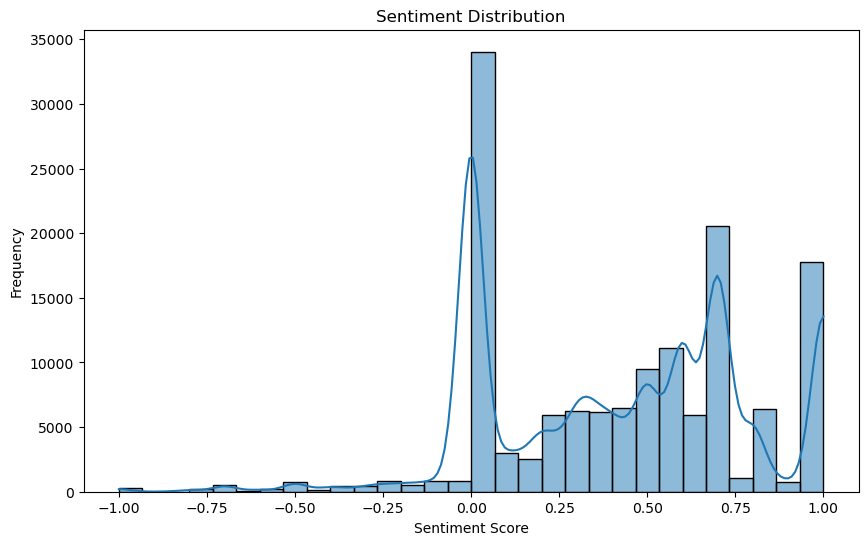

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

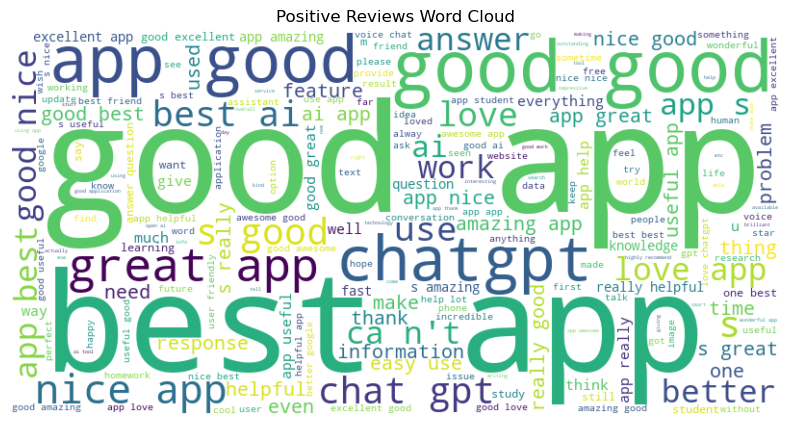

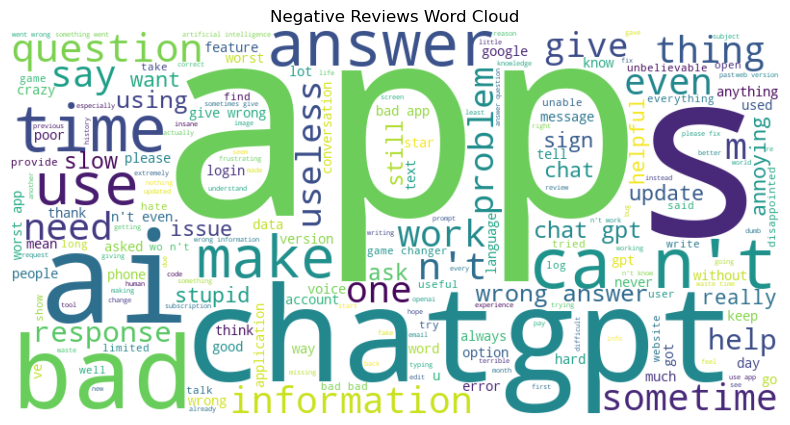

In [28]:
# Generate word cloud for positive reviews
positive_text = " ".join(positive_reviews['cleaned_content'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

# Generate word cloud for negative reviews
negative_text = " ".join(negative_reviews['cleaned_content'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

C:\Users\kshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


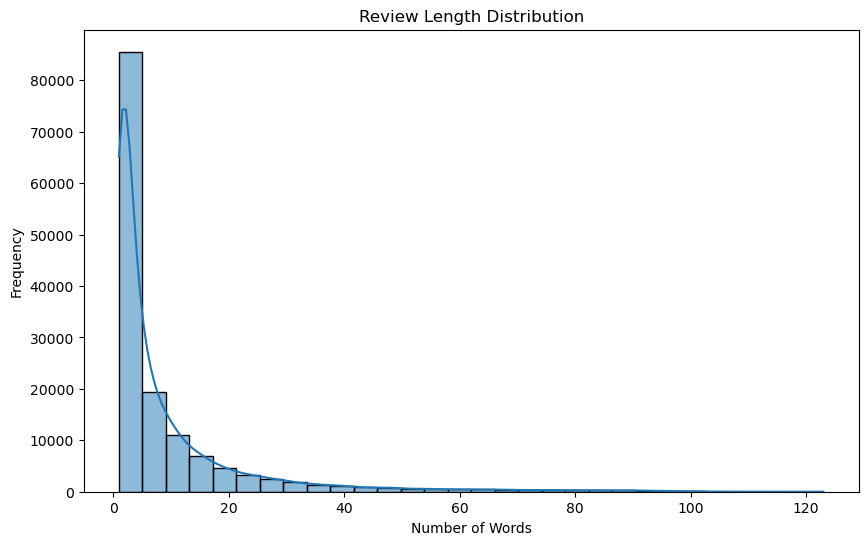

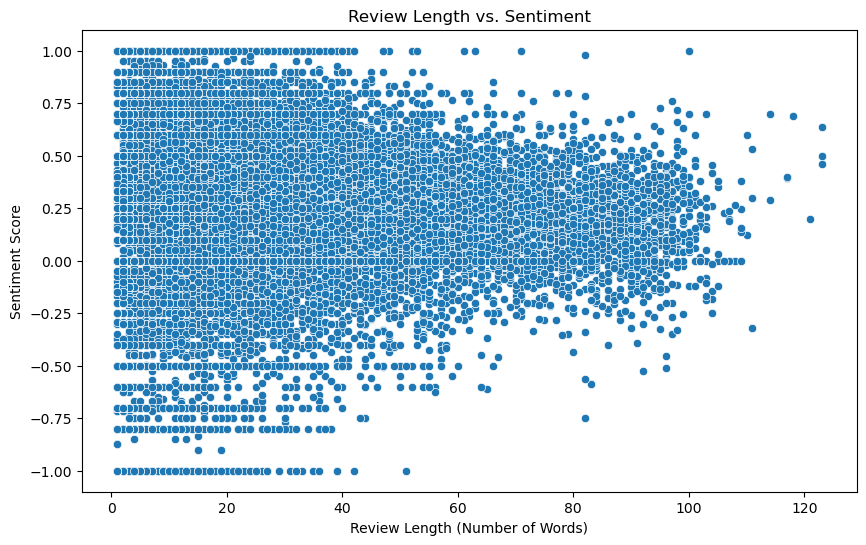

In [29]:
# Calculate review lengths
data['review_length'] = data['content'].apply(lambda x: len(str(x).split()))

# Plot review length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=30, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Correlation between review length and sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['review_length'], y=data['sentiment'])
plt.title('Review Length vs. Sentiment')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Sentiment Score')
plt.show()



In [30]:
# Correlation between review length and sentiment
correlation = data[['review_length', 'sentiment']].corr()
print("Correlation between review length and sentiment:")
print(correlation)

Correlation between review length and sentiment:
               review_length  sentiment
review_length       1.000000  -0.189056
sentiment          -0.189056   1.000000


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the cleaned content with bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams_matrix = vectorizer.fit_transform(data['cleaned_content'])

# Convert bigrams matrix to DataFrame
bigrams_df = pd.DataFrame(bigrams_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Get the most common bigrams
common_bigrams = bigrams_df.sum().sort_values(ascending=False).head(20)

# Display the most common bigrams
print("Most Common Bigrams:")
print(common_bigrams)

MemoryError: Unable to allocate 258. GiB for an array with shape (143445, 241039) and data type int64

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Vectorize the cleaned content with bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams_matrix = vectorizer.fit_transform(data['cleaned_content'])

# Convert bigrams matrix to DataFrame
bigrams_df = pd.DataFrame(bigrams_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the counts of each bigram
bigram_counts = bigrams_df.sum().sort_values(ascending=False).head(20)

# Display the most common bigrams
print("Most Common Bigrams:")
print(bigram_counts)

MemoryError: Unable to allocate 258. GiB for an array with shape (143445, 241039) and data type int64

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Ensure the 'cleaned_content' column exists and is not empty
if 'cleaned_content' in data.columns and not data['cleaned_content'].empty:
    # Vectorize the cleaned content with bigrams
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    
    try:
        bigrams_matrix = vectorizer.fit_transform(data['cleaned_content'])
        
        # Convert bigrams matrix to DataFrame
        bigrams_df = pd.DataFrame(bigrams_matrix.toarray(), columns=vectorizer.get_feature_names_out())
        
        # Sum the counts of each bigram
        bigram_counts = bigrams_df.sum().sort_values(ascending=False).head(20)
        
        # Display the most common bigrams
        print("Most Common Bigrams:")
        print(bigram_counts)
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("The 'cleaned_content' column is either missing or empty.")

An error occurred: Unable to allocate 258. GiB for an array with shape (143445, 241039) and data type int64


In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Ensure the 'cleaned_content' column exists and is not empty
if 'cleaned_content' in data.columns and not data['cleaned_content'].empty:
    # Vectorize the cleaned content with bigrams and limit the vocabulary size
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=10000)
    
    try:
        bigrams_matrix = vectorizer.fit_transform(data['cleaned_content'])
        
        # Convert bigrams matrix to DataFrame
        bigrams_df = pd.DataFrame(bigrams_matrix.toarray(), columns=vectorizer.get_feature_names_out())
        
        # Sum the counts of each bigram
        bigram_counts = bigrams_df.sum().sort_values(ascending=False).head(20)
        
        # Display the most common bigrams
        print("Most Common Bigrams:")
        print(bigram_counts)
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("The 'cleaned_content' column is either missing or empty.")

Most Common Bigrams:
good app           4183
best app           3494
chat gpt           2566
great app          2400
nice app           2268
best ai            1866
love app           1413
amazing app        1190
app help            952
easy use            910
really good         897
ai app              892
answer question     883
useful app          842
app good            825
helpful app         792
help lot            770
really helpful      751
excellent app       643
app really          633
dtype: int64


In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Ensure the 'cleaned_content' column exists and is not empty
if 'cleaned_content' in data.columns and not data['cleaned_content'].empty:
    # Vectorize the cleaned content with trigrams and limit the vocabulary size
    vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=10000)
    
    try:
        trigrams_matrix = vectorizer.fit_transform(data['cleaned_content'])
        
        # Convert trigrams matrix to DataFrame
        trigrams_df = pd.DataFrame(trigrams_matrix.toarray(), columns=vectorizer.get_feature_names_out())
        
        # Sum the counts of each trigram
        trigram_counts = trigrams_df.sum().sort_values(ascending=False).head(20)
        
        # Display the most common trigrams
        print("Most Common Trigrams:")
        print(trigram_counts)
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("The 'cleaned_content' column is either missing or empty.")

Most Common Trigrams:
best ai app                428
app help lot               171
really good app            160
chatgpt android app        154
good app help              147
best ai tool               120
love chat gpt              118
user friendly interface    114
best app student           114
ai language model          113
good app student           111
chat gpt best              105
app really helpful         101
best app used               99
best app seen               99
best app world              97
app easy use                96
chat gpt good               96
really like app             95
app really good             89
dtype: int64


In [36]:
# Group by appVersion and calculate the mean sentiment score
average_sentiment = data.groupby('appVersion')['sentiment'].mean().reset_index()

# Rename the columns for clarity
average_sentiment.columns = ['App Version', 'Average Sentiment Score']

# Display the result
print(average_sentiment)


   App Version  Average Sentiment Score
0     1.0.0016                 0.378329
1     1.0.0022                 0.381086
2     1.0.0023                 0.333828
3     1.0.0026                 0.342457
4     1.0.0030                 0.383692
..         ...                      ...
63  1.2024.139                 0.446755
64  1.2024.143                 0.417455
65  1.2024.151                 0.429113
66  1.2024.157                 0.432968
67  1.2024.163                 0.150000

[68 rows x 2 columns]


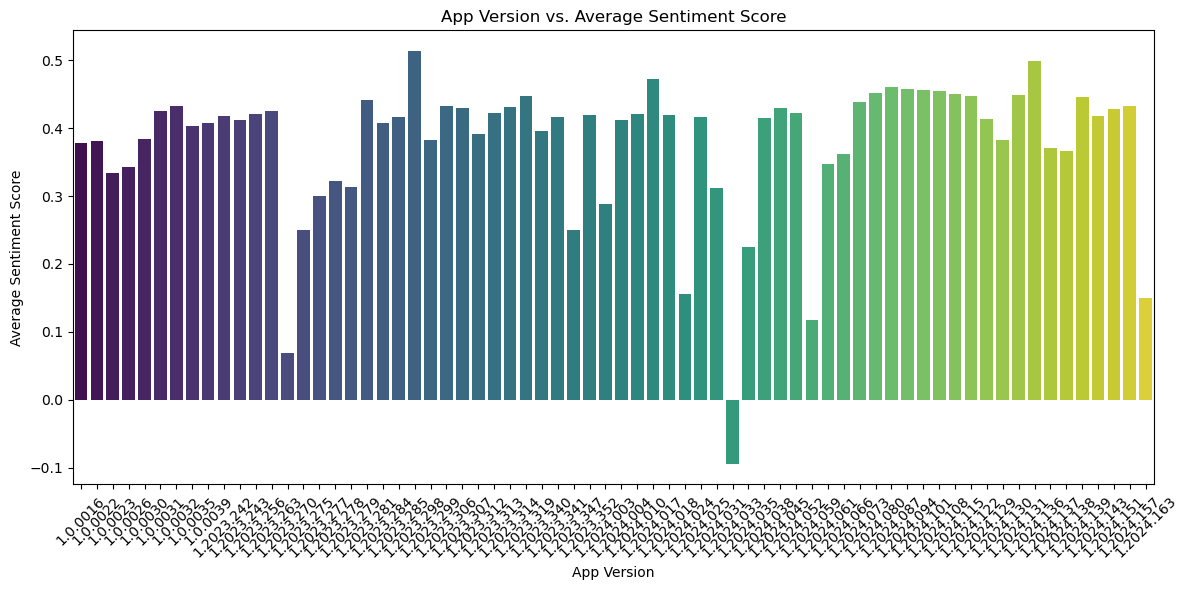

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for app version vs. average sentiment score
plt.figure(figsize=(12, 6))
sns.barplot(x='App Version', y='Average Sentiment Score', data=average_sentiment, palette='viridis')
plt.xlabel('App Version')
plt.ylabel('Average Sentiment Score')
plt.title('App Version vs. Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()